In [14]:
import numpy as np 
class Adaline:
    def __init__(self, edu = 0.01, n_iter = 50):
        self.edu = edu
        self.n_iter =  n_iter
        
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return self.net_input(x)
    
    def predict(self,x):
        return np.where(self.activation(x) >= 0.0, 1, -1)
    
    def fit(self, x, y):
        self.w_ = np.zeros(1 + x.shape[1] )
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(x)
            errors = y - output
            
            print(x.T.dot(errors).shape)
            self.w_[1:] += self.edu * x.T.dot(errors)
            self.w_[0] += self.edu * errors.sum()
            cost = (errors**2).sum() / 2.0 
            self.cost_.append(cost)
        return self
            
        
        

In [12]:
import pandas as pd 
url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
df = pd.read_csv(url, header = None)

y = df.iloc[1:101,4].values
y = np.where(y == 'setosa', -1, 1)
x = df.iloc[1:101,[0,2]].values
x = x.astype(float)



(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


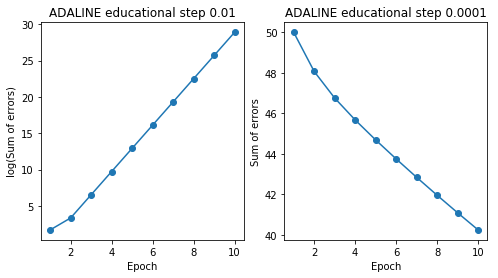

In [15]:
import matplotlib.pyplot as plt 

fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))
ada1 = Adaline(0.01,10).fit(x,y)
ax[0].plot( range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_),marker = "o")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("log(Sum of errors)")
ax[0].set_title("ADALINE educational step {0}".format(ada1.edu))

ada2 = Adaline(0.0001,10).fit(x,y)
ax[1].plot( range(1, len(ada2.cost_) + 1), ada2.cost_,marker = "o")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Sum of errors")
ax[1].set_title("ADALINE educational step {0}".format(ada2.edu))


plt.show()

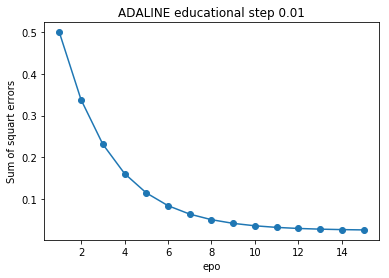

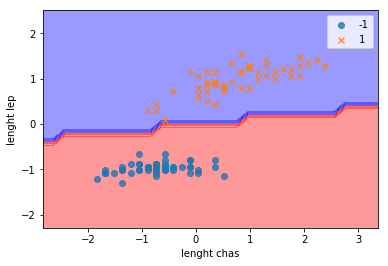

In [61]:
import func as f 

x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()  ) /x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()  ) /x[:,1].std()


ada1 = Adaline(0.01,15).fit(x_std,y)

plt.plot( range(1, len(ada1.cost_) + 1), ada1.cost_, marker = "o")
plt.xlabel("epo")
plt.ylabel("Sum of squart errors")
plt.title("ADALINE educational step {0}".format(ada1.edu))
plt.show()


f.plot_desicion_regions(x_std,y,classifier = ada1)
plt.xlabel("lenght chas")
plt.ylabel("lenght lep")
plt.legend(loc ="best")
plt.show()